In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
train_data = pd.read_csv("trainKNN.txt", header=None)

test_data = pd.read_csv('testKNN.txt', header=None)
print(train_data)

      0        1      2     3     4      5     6     7     8    9   10
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0   1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0   1
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0   1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0   1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0   1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...  ..
191  207  1.51645  14.94  0.00  1.87  73.11  0.00  8.67  1.38  0.0   7
192  208  1.51831  14.39  0.00  1.82  72.86  1.41  6.47  2.88  0.0   7
193  209  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.0   7
194  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0   7
195  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0   7

[196 rows x 11 columns]


In [3]:
train_data.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
train_data = train_data.drop('ID', axis=1) 
print(train_data)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type of glass
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0              1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0              1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0              1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0              1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0              1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...            ...
191  1.51645  14.94  0.00  1.87  73.11  0.00  8.67  1.38  0.0              7
192  1.51831  14.39  0.00  1.82  72.86  1.41  6.47  2.88  0.0              7
193  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.0              7
194  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0              7
195  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0              7

[196 rows x 10 columns]


In [4]:
## data cleaning

train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             196 non-null    float64
 1   Na             196 non-null    float64
 2   Mg             196 non-null    float64
 3   Al             196 non-null    float64
 4   Si             196 non-null    float64
 5   K              196 non-null    float64
 6   Ca             196 non-null    float64
 7   Ba             196 non-null    float64
 8   Fe             196 non-null    float64
 9   Type of glass  196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.4 KB


In [5]:
train_data.isnull().sum()
# it doesn't have null values

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [6]:
train_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516457,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [7]:
test_data.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
test_data = test_data.drop('ID', axis=1) 
print(test_data)

         RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type of glass
0   1.52152  13.05  3.65  0.87  72.32  0.19   9.85  0.00  0.17              1
1   1.52152  13.12  3.58  0.90  72.20  0.23   9.82  0.00  0.16              1
2   1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.00  0.03              1
3   1.51709  13.00  3.47  1.79  72.72  0.66   8.18  0.00  0.00              2
4   1.51660  12.99  3.18  1.23  72.97  0.58   8.81  0.00  0.24              2
5   1.51839  12.85  3.67  1.24  72.57  0.62   8.68  0.00  0.35              2
6   1.51832  13.33  3.34  1.54  72.14  0.56   8.99  0.00  0.00              3
7   1.51934  13.64  3.54  0.75  72.65  0.16   8.89  0.15  0.24              3
8   1.52211  14.19  3.78  0.91  71.36  0.23   9.14  0.00  0.37              3
9   1.52043  13.38  0.00  1.40  72.25  0.33  12.50  0.00  0.00              5
10  1.52058  12.85  1.61  2.17  72.18  0.76   9.70  0.24  0.51              5
11  1.52119  12.97  0.33  1.51  73.39  0.13  11.27  0.00  0.28  

In [8]:
test_data.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [9]:
test_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,1.517413,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


In [10]:
# # standardization 
# def standardizaion_process (item):
#     for col in item.columns:
#         if col != "Type of glass": # we can't standardize the categorical variable
#             item[col] = (item[col] - item[col].mean())/item[col].std()
#     return item

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data.iloc[:,:-1]=scaler.fit_transform(train_data.iloc[:,:-1])
test_data.iloc[:,:-1] = scaler.transform(test_data.iloc[:,:-1])
train_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,0.890812,0.338985,1.246160,-0.722499,-1.123132,-0.684647,-0.113350,-0.339357,-0.583422,1
1,-0.224796,0.659028,0.605450,-0.192354,0.124197,-0.058701,-0.762215,-0.339357,-0.583422,1
2,-0.694007,0.198166,0.569455,0.174669,0.465571,-0.192833,-0.797480,-0.339357,-0.583422,1
3,-0.208390,-0.211490,0.670241,-0.335086,-0.033360,0.075430,-0.487153,-0.339357,-0.583422,1
4,-0.287138,-0.134679,0.619848,-0.437037,0.583739,0.045623,-0.592946,-0.339357,-0.583422,1
...,...,...,...,...,...,...,...,...,...,...
191,-0.605415,2.003210,-1.986187,0.847545,0.623128,-0.774067,-0.169773,2.512125,-0.583422,7
192,0.004888,1.299115,-1.986187,0.745594,0.294884,1.327320,-1.721408,5.611561,-0.583422,7
193,-0.621821,1.273511,-1.986187,2.621491,0.281754,-0.774067,0.380352,0.776440,-0.583422,7
194,-0.677601,0.979071,-1.986187,2.906954,-0.033360,-0.654840,0.189924,1.850912,-0.583422,7


In [12]:
# train_stand=standardizaion_process (train_data)
# test_stand=standardizaion_process (test_data)
# print(train_stand)

In [13]:
# Finding number of clusters required.

In [14]:
x_train = train_data.drop(["Type of glass"], axis=1)
y_train = train_data["Type of glass"]

In [15]:
x_test = test_data.drop(["Type of glass"], axis=1)
y_test = test_data["Type of glass"]

Silhouette method
For n_clusters=2 the silhouette score is 0.4611456216924569
For n_clusters=3 the silhouette score is 0.4708797473288397
For n_clusters=4 the silhouette score is 0.4122453659277596
For n_clusters=5 the silhouette score is 0.3447243000264229
For n_clusters=6 the silhouette score is 0.3283396074827695
For n_clusters=7 the silhouette score is 0.34427422907935207
For n_clusters=8 the silhouette score is 0.36409555172781105
Elbow curve method


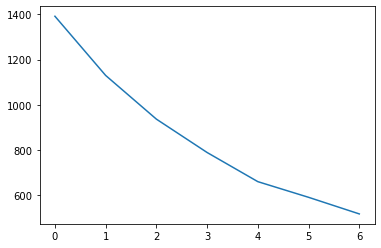

In [16]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
print("Silhouette method")
for i in range_n_clusters:
    kmeans=KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(x_train)
    ssd.append(kmeans.inertia_)
    cluster_label=kmeans.labels_
    
    silhouette_avg=silhouette_score(x_train,cluster_label)
    
    print("For n_clusters={0} the silhouette score is {1}".format(i,silhouette_avg))
    
print("Elbow curve method")
plt.plot(ssd)

In [17]:
#Based on analysis on elbow curve method and silhoutte analysis , we can choose 4 clusters
k=4

In [18]:
# Euclid model 

In [19]:
euclid_model = KNeighborsClassifier(n_neighbors=k, metric=distance.sqeuclidean) # Square Euclidean distance model

euclid_model.fit(x_train,y_train) # Train models
euclid_predictions = euclid_model.predict(x_test) 


In [20]:
# manhatten model

In [21]:
manhattan_model = KNeighborsClassifier(n_neighbors=k, metric=distance.cityblock) # Manhattan distance model
manhattan_model.fit(x_train, y_train)
manhattan_predictions = manhattan_model.predict(x_test)

In [22]:
# Predictions comparison

In [23]:
pred_comp = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
pred_comp.head(20)

,actual,manhattan,euclid
0,1,1,1
1,1,1,1
2,1,1,1
3,2,2,2
4,2,1,1
5,2,1,2
6,3,1,1
7,3,1,1
8,3,1,1
9,5,5,2


In [24]:
# Performance evalutions

In [25]:

manhattan_count = len(pred_comp.loc[pred_comp['manhattan'] == pred_comp['actual']])
euclid_count = len(pred_comp.loc[pred_comp['euclid'] == pred_comp['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(pred_comp), 2)))
print(classification_report(y_test, manhattan_predictions, target_names=pred_comp['actual'].astype(str).unique()))
print ('\n')
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(pred_comp), 2)))
print(classification_report(y_test, euclid_predictions, target_names=pred_comp['actual'].astype(str).unique()))

Manhattan Accuracy: 50.0%
              precision    recall  f1-score   support

           1       0.38      1.00      0.55         3
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.50        18
   macro avg       0.56      0.50      0.45        18
weighted avg       0.56      0.50      0.45        18



Square Euclidean Accuracy: 50.0%
              precision    recall  f1-score   support

           1       0.38      1.00      0.55         3
           2       0.40      0.67      0.50         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy    

C:\Users\sanka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
